In [67]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [68]:
data = pd.read_csv('usd_kzt.csv', encoding = 'UTF-8', delimiter = ',')

In [69]:
date_series = data['Date'].values
usd_series = data['USD'].values

In [76]:
N = len(usd_series)
tau = (N + 1) // 8
n = N - tau

Преобразование одномерного ряда в многомерный

In [77]:
X = [usd_series[i: N - tau + i] for i in range(tau)]
X = np.array(X)

In [78]:
cov_m = np.cov(X)
e_val, e_vec = np.linalg.eig(cov_m)

Переход к главным компонентам

In [79]:
r = 15
e_vec = e_vec[:r]
Y = e_vec.T.dot(X[:r])

In [85]:
new_X = e_vec.dot(Y)

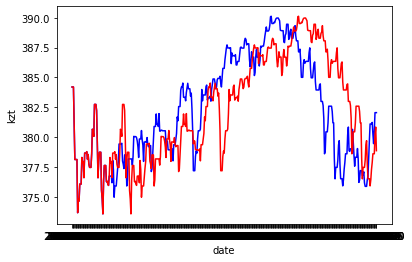

In [86]:
real = np.hstack((X[0][:tau], X[tau - 1]))
prediction = np.hstack((new_X[0][:tau], new_X[r - 1]))

plt.plot(date_series, real, 'b')
plt.plot(date_series, prediction, 'r' )
plt.xlabel('date')
plt.ylabel('kzt')
plt.show()